In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
import pandas as pd
import os

In [55]:
path = '/Users/adithyaiyer/Desktop/TimeSeries/'
list_files = os.listdir(path)
list_files.sort()
j = 0
for i in list_files:
    list_files[j] = path+i
    j = j+1


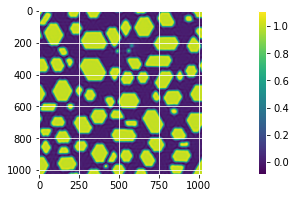

419430.644825609


In [57]:
img_ = corr.dat_to_numpy(list_files[180])
plt.imshow(img_)
plt.colorbar()
plt.show()
print(np.sum(img_))

In [67]:
def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D

In [58]:
velocity1 = corr.velocityDirection(list_files, 180, 2)
#velocityDir =corr.gradientDirection(img_,0.3)

velocity in pixels per time step of image aquisition (of image frequency)


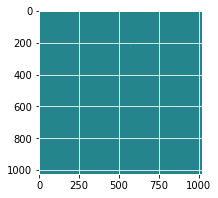

In [59]:
plt.imshow(velocity1[1])

In [2]:
x = np.zeros((128,128))
y = np.zeros((128,128))
             
for i in range(0,128):
    for j in range(0,128):
        if np.max(velocity1[0][i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            x[i][j] = np.min(velocity1[0][i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            x[i][j] = np.max(velocity1[0][i*8:(i+1)*8,j*8:(j+1)*8])
        if np.max(velocity1[1][i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            y[i][j] = np.min(velocity1[1][i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            y[i][j] = np.max(velocity1[1][i*8:(i+1)*8,j*8:(j+1)*8])
        
        
        

NameError: name 'np' is not defined

In [1]:
plt.imshow(x)
plt.colorbar()

NameError: name 'plt' is not defined

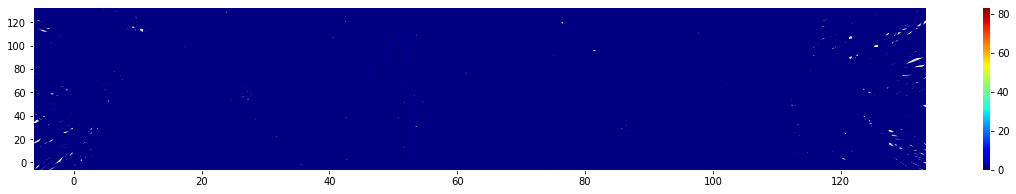

In [64]:

Fx = y
Fy = x
x_ = np.arange(0,128)
y_ = np.arange(0,128)

M = np.sqrt(x*x+y*y)
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
qq =plt.quiver(X, Y, Fx, Fy,M,scale = 0.03,cmap=plt.cm.jet)
plt.colorbar(qq,cmap=plt.cm.jet)
#plt.rcParams["figure.figsize"] = (20,3)
plt.show()


In [24]:
A =[]
B = []
for i in range(1,66):
    A.append(corr.radiusCircular(list_files,15*i, 2))
    B.append(15*i)

Text(0, 0.5, 'radius in pixels')

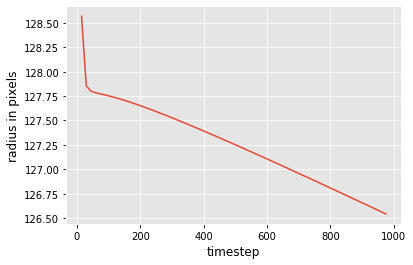

In [25]:
plt.plot(B,A)
plt.xlabel('timestep')
plt.ylabel('radius in pixels')